<a href="https://colab.research.google.com/github/rushilg13/AI-based-Crop-Identification-App/blob/master/Crop_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "torch==1.4" "torchvision==0.5.0" #restart runtime after its done executing only if asked for.

     |████████████████████████████████| 753.4MB 18kB/s 
     |████████████████████████████████| 4.0MB 33.5MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [3]:
from fastai.vision import *

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
%cd /content/gdrive/My\ Drive
path=Path('Crop_Identifier/train') #set your path based on where you store.

/content/gdrive/My Drive


In [7]:
!ls {path} #printing list of files/folder in the path

Aloe	Bhringraj  Cotton	 Lemongrass  Neem    Sage
Bamboo	Brahmi	   Curry_Leaves  Maize	     Pea     Sugarcane
Banana	Catnip	   Fennel	 Mint	     potato  Tulsi
Bay	Coriander  Jute		 models      Rice    Wheat


In [8]:
classes = ['Aloe',	'Bhringraj' , 'Cotton'	 ,'Lemongrass' , 'Pea'  ,   'Sugarcane'
,'Bamboo'	,'Brahmi'	,   'Curry_Leaves',  'Maize'	 ,    'potato' , 'Tulsi'
,'Banana'	,'Catnip'	,  'Fennel'	, 'Mint'	 ,    'Rice' ,  'Wheat'
,'Bay'	,'Coriander' , 'Jute'	, 'Neem'	 ,    'Sage'] ##Classification problem 

In [9]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500 )

Aloe


Bhringraj


Cotton


Lemongrass


Pea


Sugarcane


Bamboo


Brahmi


Curry_Leaves


Maize


potato


Tulsi


Banana


Catnip


Fennel


Mint


Rice


Wheat


Bay


Coriander


Jute


Neem


Sage


In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".", valid_pct=0.2,
ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats) #Go to PPT

In [11]:
data.classes

['Aloe',
 'Bamboo',
 'Banana',
 'Bay',
 'Bhringraj',
 'Brahmi',
 'Catnip',
 'Coriander',
 'Cotton',
 'Curry_Leaves',
 'Fennel',
 'Jute',
 'Lemongrass',
 'Maize',
 'Mint',
 'Neem',
 'Pea',
 'Rice',
 'Sage',
 'Sugarcane',
 'Tulsi',
 'Wheat',
 'potato']

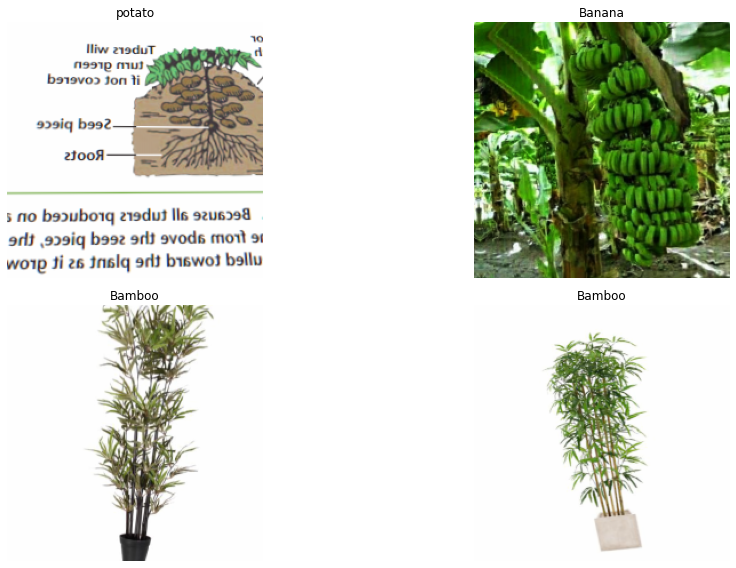

In [17]:
data.show_batch(rows=2, figsize=(16,8))

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate) #CNN:  Convolution neural net

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [13]:
learn.fit_one_cycle(10) 

In [11]:
learn.lr_find()

NameError: ignored

In [1]:
learn.recorder.plot()

NameError: ignored

In [2]:
learn.fit_one_cycle(10, max_lr=slice(6.4*10**-7,6.6*10**-7))

NameError: ignored

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

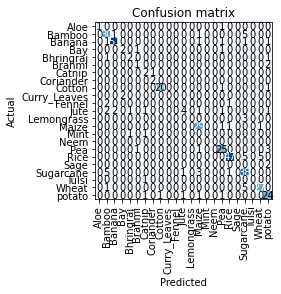

In [18]:
interp.plot_confusion_matrix()

In [19]:
from fastai.widgets import ClassConfusion

In [20]:
ClassConfusion(interp,classes)

Please enter a value for `k`, or the top images you will see: 1


100%|██████████| 51/51 [00:41<00:00,  1.23it/s]


<Figure size 432x288 with 0 Axes>

In [22]:
learn.save('stage-1')

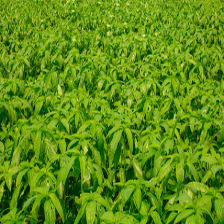

In [23]:
path=Path('Crop_Identifier/test')
img = open_image(path/'Test.jpg')
img.resize(torch.Size([img.shape[0],224,224]))

In [24]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'Jute'